In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import json

In [4]:
df = pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot: >

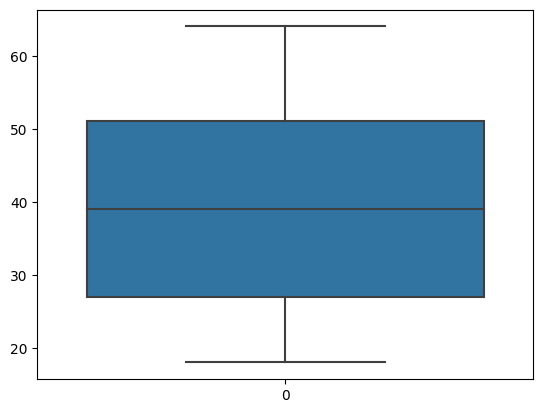

In [8]:
#1. age
sns.boxplot(df['age'])

In [9]:
#2. sex

df['sex'] = df['sex'].replace({'male':0,'female':1})

In [10]:
df['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [11]:
#3. bmi
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<AxesSubplot: >

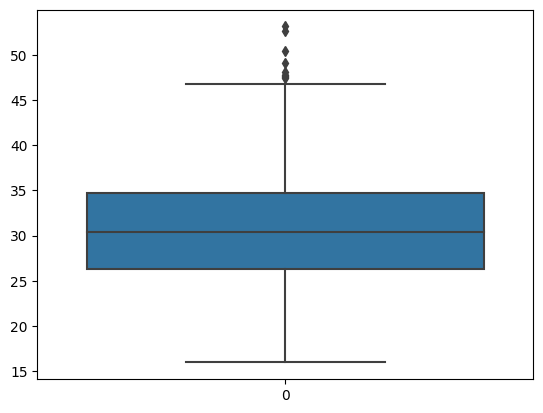

In [12]:
sns.boxplot(df['bmi'])

In [13]:
df['bmi'].mean()

30.66339686098655

In [14]:
df['bmi'].median()

30.4

In [15]:
df['bmi'] = np.where(df['bmi']>48,df['bmi'].mean(),df['bmi'])

<AxesSubplot: >

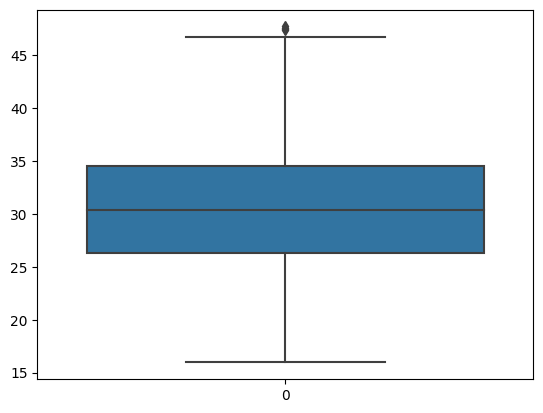

In [16]:
sns.boxplot(df['bmi'])

In [17]:
#4. children
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [19]:
#5. smoker
df['smoker'].replace({'no':0, 'yes':1}, inplace=True)

In [20]:
#6. region
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
df = pd.get_dummies(df,columns=['region'])

In [24]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


### Model training

In [27]:
x = df.drop('charges',axis=1)
y = df['charges']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
x_train.shape

(1070, 9)

In [30]:
x_test.shape

(268, 9)

In [31]:
y_train.shape

(1070,)

In [33]:
model = LinearRegression()
model

LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

## Testing

In [35]:
# Test data eveluation

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('MSE :', mse)

rmse = np.sqrt(mse)
print('RMSE :', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

r2_value = r2_score(y_test, y_pred)
print('R-Squared :', r2_value)

MSE : 37877591.491868384
RMSE : 6154.47735326635
MAE : 4237.262920750353
R-Squared : 0.7477866602676475


In [36]:
# Training data evaluation

y_pred = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

mae = mean_absolute_error(y_train,y_pred)
print('MAE:',mae)

r2_value = r2_score(y_train,y_pred)
print('R-Squared :', r2_value)

MSE: 36174904.01051838
RMSE: 6014.557673721184
MAE: 4141.016318588825
R-Squared : 0.7515061545959598


### Testing on single row 

In [37]:
x.head(1).T

,0
age,19.0
sex,1.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [64]:
age=19.0
sex='female'
bmi=27.9
children=0.0
smoker='yes'
region='southwest'

#charges need to predict for that we need to create input 2d array

In [39]:
x.shape[1]

9

In [65]:
project_data = {'sex':{'male':0,'female':1},
               'smoker':{'no':0,'yes':1},
               'columns':list(x.columns)}
project_data

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [45]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [52]:
# to find region index

new_region = 'region_'+region
region_index = np.where(column_names==new_region)[0][0]
region_index

8

In [67]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = project_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data['smoker'][smoker]
test_array[region_index] = 1
test_array

array([19. ,  1. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ])

In [68]:
project_data['sex'][sex]

1

In [72]:
result = model.predict([test_array])
result[0]

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25271.951579410863

In [74]:
y.head(1)

0    16884.924
Name: charges, dtype: float64

In [75]:
df.head(1)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.924,0,0,0,1


In [76]:
with open('linear_model.pkl','wb') as f:
    pickle.dump(model,f)

In [77]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)